In [1]:
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt

/Users/xiguan/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
from shapely import wkt

In [7]:
import pandas as pd

In [2]:
msa = gpd.read_file("/Volumes/Xi/stephan/tl_2019_us_cbsa/tl_2019_us_cbsa.shp")
msa = msa.to_crs(epsg=4326)
mask = msa['NAMELSAD'].str.contains('Micro Area', na=False)
msa = msa[~mask]
msa.loc[msa['NAME'] == 'Louisville/Jefferson County, KY-IN', 'NAME'] = 'Louisville_Jefferson County, KY-IN'
cities=list(msa['NAME'])

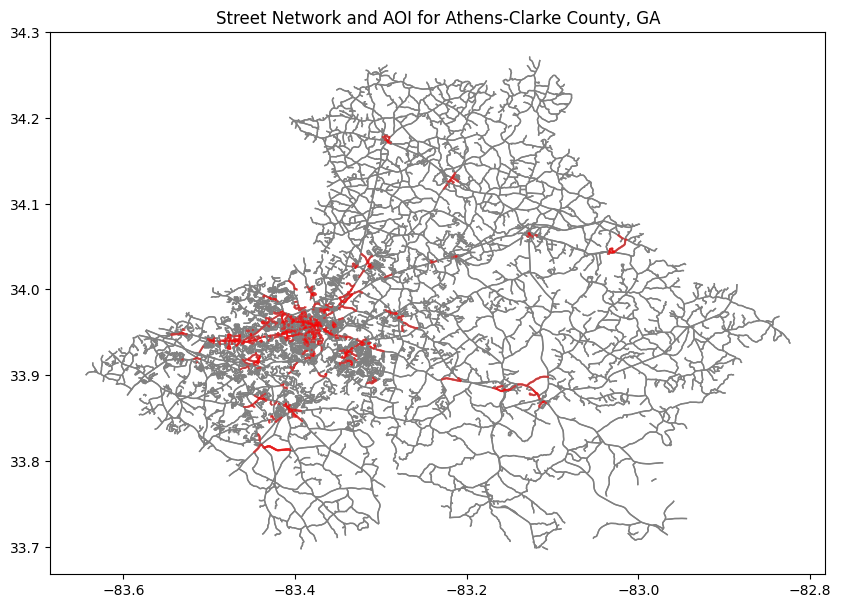

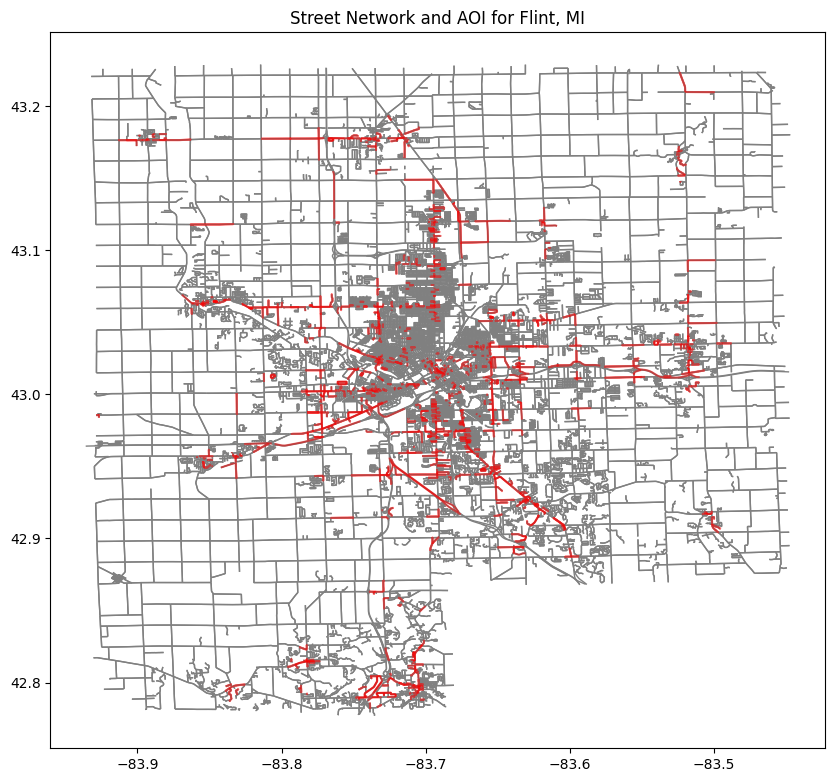

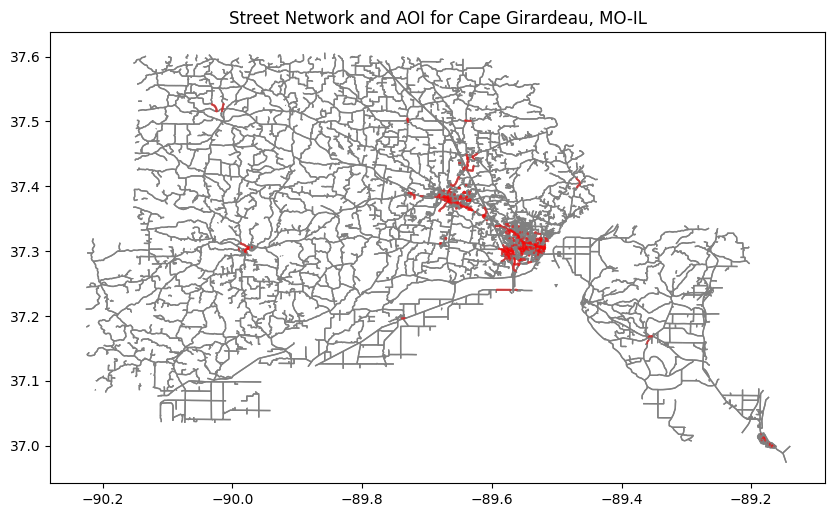

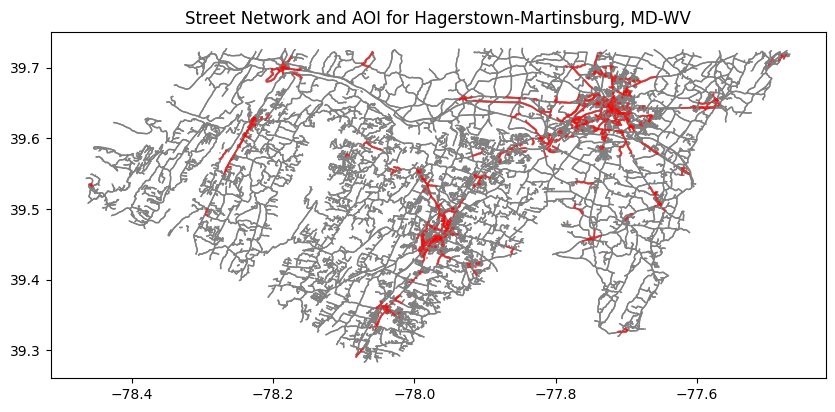

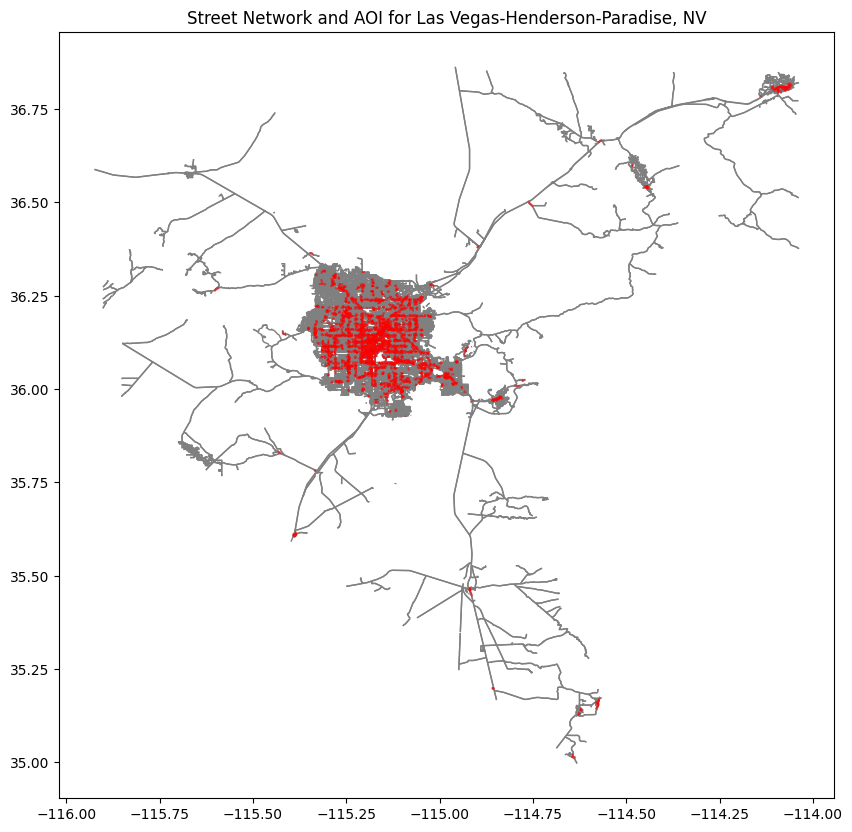

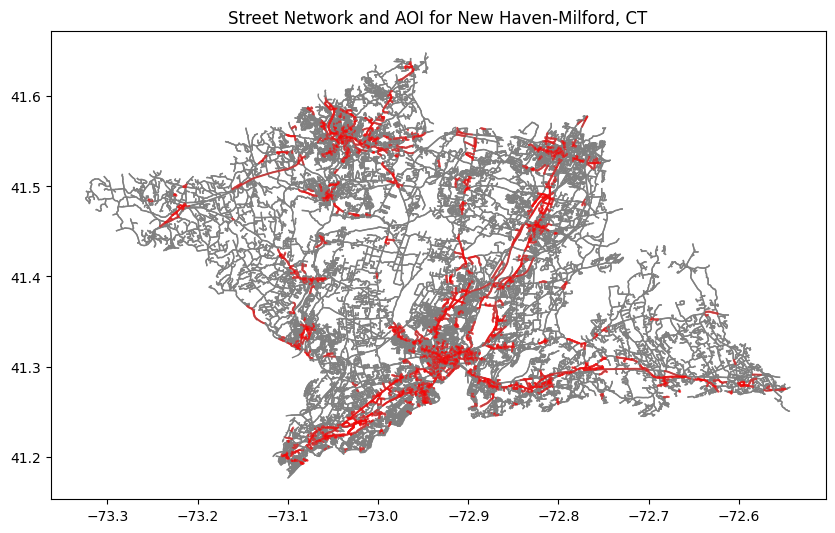

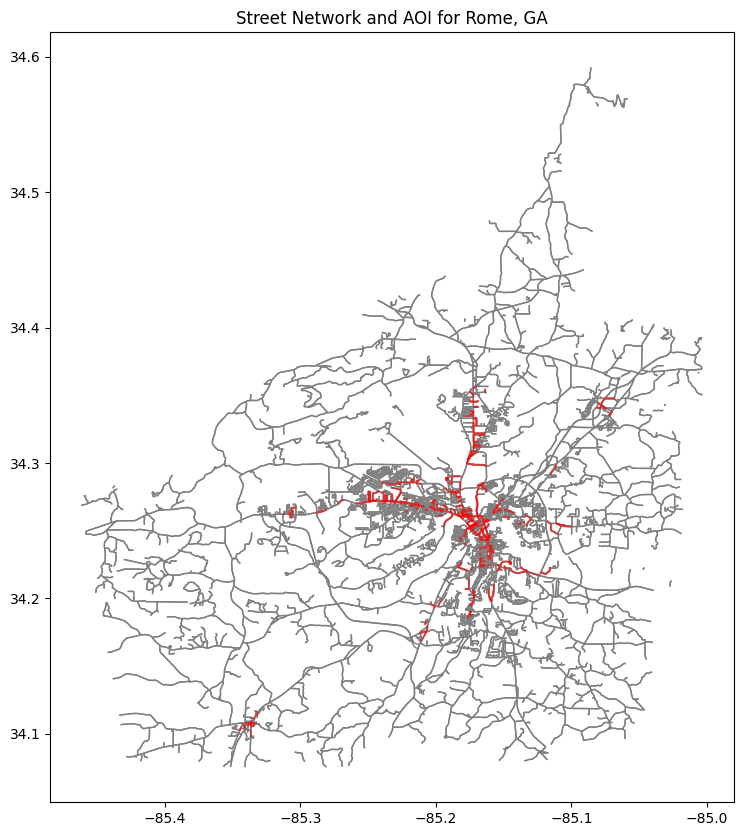

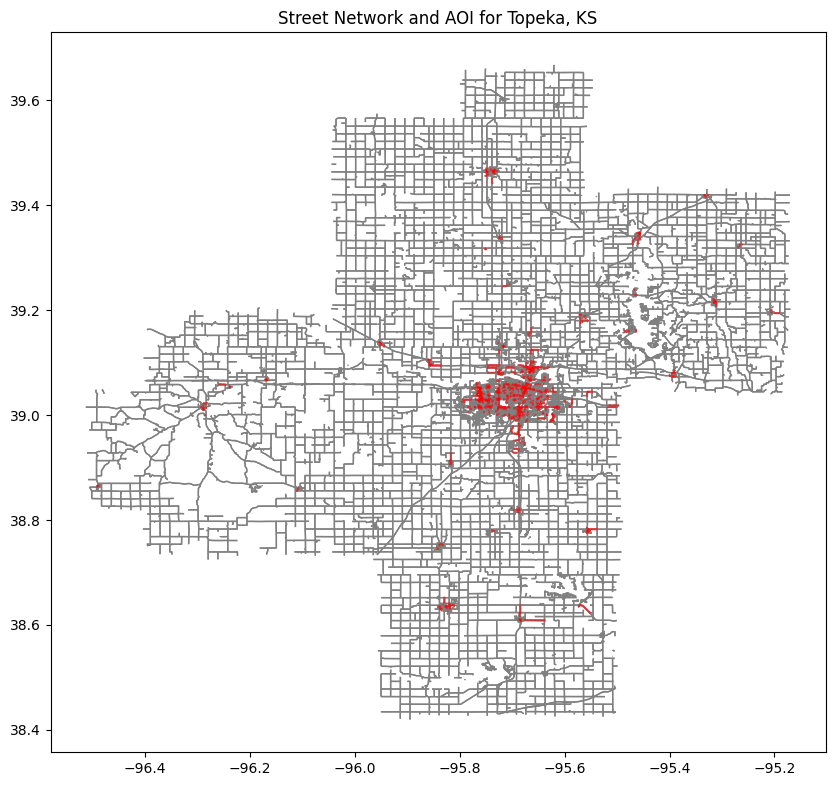

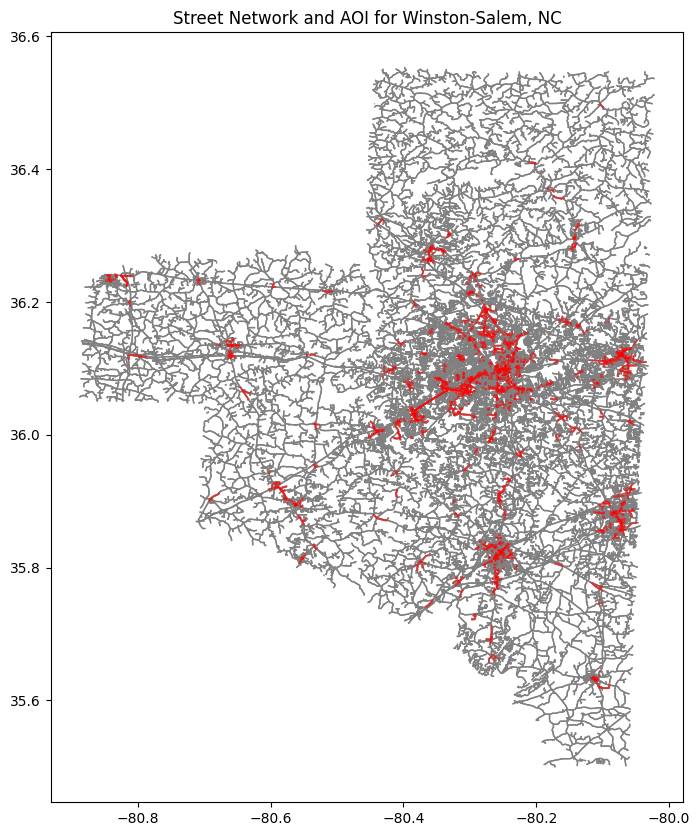

In [8]:
for i in [0,50,100,150,200,250,300,350,379]:
    # 加载图
    city=cities[i]
    graph = ox.load_graphml(f'/Volumes/Xi兔/osmnx/msa_graphml/{city}.graphml')
    
    # 将街道段（边）转换为 GeoDataFrame
    edges = ox.graph_to_gdfs(graph, nodes=False)

    # 加载 AOI 数据
    AOI = pd.read_csv(f'/Volumes/Xi兔/POI+street/TIN_AOI/AOI_{city}.csv')

    AOI['geometry'] = AOI['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)  # 转换字符串为 Shapely 几何对象
    aoi_gdf = gpd.GeoDataFrame(AOI, geometry=gpd.GeoSeries(AOI['geometry']))

    # 创建绘图
    fig, ax = plt.subplots(figsize=(10, 10))

    # 绘制街道网络
    edges.plot(ax=ax, linewidth=1, edgecolor="grey")

    # 绘制 AOI
    aoi_gdf.set_geometry('geometry').plot(ax=ax, color="red", alpha=0.5, edgecolor="black")

    # 设置标题
    ax.set_title(f'Street Network and AOI for {city}')

    # 显示绘图
    plt.show()